<a href="https://colab.research.google.com/github/Karthik2830/Karthik2830/blob/main/4_implementation_of_multiple_dense_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()



11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0



In [4]:
# Flatten the images from 28x28 to 1D array (28*28 = 784)
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))



In [5]:
# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)



In [6]:
# Build a neural network with multiple dense layers
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))



In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [8]:
# Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)



Epoch 1/5
750/750 [==============================] - 14s 13ms/step - loss: 0.3285 - accuracy: 0.9027 - val_loss: 0.1602 - val_accuracy: 0.9528
Epoch 2/5
750/750 [==============================] - 8s 11ms/step - loss: 0.1286 - accuracy: 0.9620 - val_loss: 0.1121 - val_accuracy: 0.9667
Epoch 3/5
750/750 [==============================] - 5s 6ms/step - loss: 0.0884 - accuracy: 0.9729 - val_loss: 0.1161 - val_accuracy: 0.9642
Epoch 4/5
750/750 [==============================] - 6s 8ms/step - loss: 0.0671 - accuracy: 0.9790 - val_loss: 0.1054 - val_accuracy: 0.9690
Epoch 5/5
750/750 [==============================] - 5s 7ms/step - loss: 0.0544 - accuracy: 0.9827 - val_loss: 0.0984 - val_accuracy: 0.9703


In [9]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'\nTest Accuracy: {test_acc * 100:.2f}%')



313/313 [==============================] - 1s 2ms/step - loss: 0.0874 - accuracy: 0.9719

Test Accuracy: 97.19%


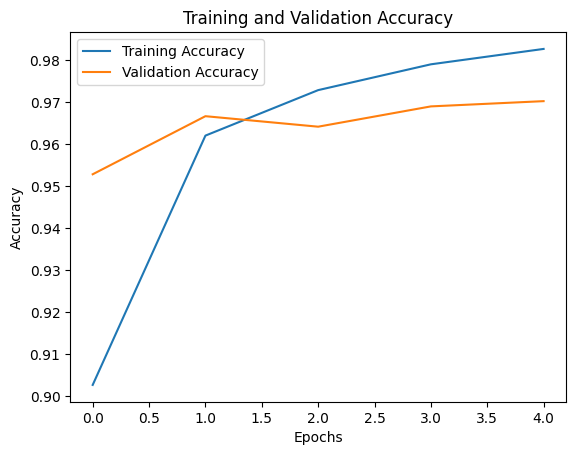

In [10]:
# Plot training and validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


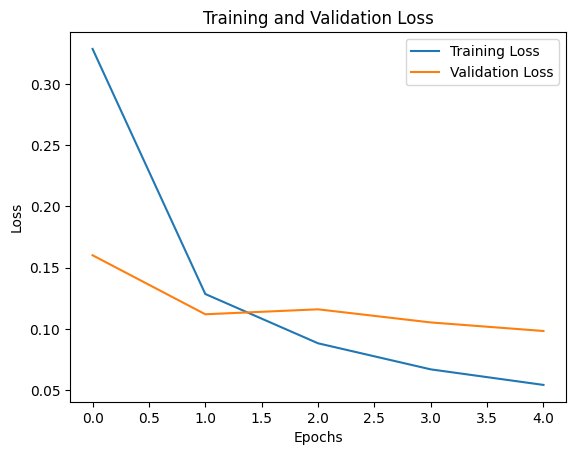

In [11]:

# Plot training and validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()